In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from fiesta.train.Benchmarker import Benchmarker
from fiesta.inference.lightcurve_model import AfterglowFlux


In [2]:
name = "gaussian"
model_dir = f"./model/"
FILTERS = ["radio-3GHz", "radio-6GHz", "bessellv", "X-ray-1keV"]


lc_model = AfterglowFlux(name,
                         directory = model_dir, 
                         filters = FILTERS,
                         model_type= "CVAE")

Loading metadata for model gaussian.
This surrogate gaussian should only be used in the following parameter ranges:
	 inclination_EM: (0, 1.5707963267948966)
	 log10_E0: (47, 57)
	 thetaCore: (0.01, 0.6283185307179586)
	 alphaWing: (0.2, 3.5)
	 log10_n0: (-6, 2)
	 p: (2.01, 3)
	 log10_epsilon_e: (-4, 0)
	 log10_epsilon_B: (-8, 0)
Loaded SurrogateLightcurveModel with filters ['radio-3GHz', 'radio-6GHz', 'bessellv', 'X-ray-1keV'].


In [3]:
benchmarker = Benchmarker(
                    model = lc_model,
                    data_file = "../afterglowpy_gaussian/model/afterglowpy_raw_data.h5",
                    metric_name="Linf"
                    )

Loaded filters are: ['radio-3GHz', 'radio-6GHz', 'bessellv', 'X-ray-1keV'].


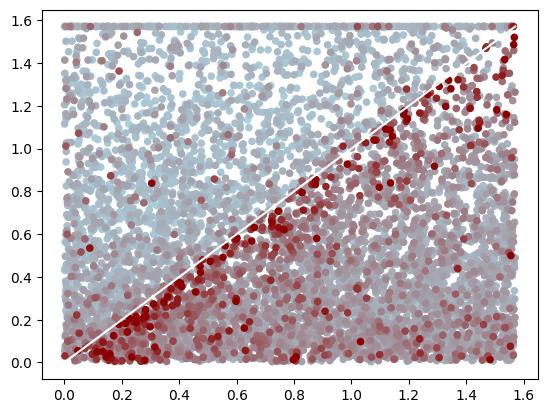

In [5]:
mismatch = benchmarker.error["radio-6GHz"]
cmap = colors.LinearSegmentedColormap.from_list(name = "mymap", colors = [(0, "lightblue"), (1, "darkred")])
colored_mismatch = cmap(mismatch/2)

sort = np.argsort(mismatch)
plt.scatter(benchmarker.test_X_raw[sort,0], benchmarker.test_X_raw[sort,3] * benchmarker.test_X_raw[sort,2], c = colored_mismatch[sort], s = 20, rasterized = True)
plt.plot(np.linspace(0, np.pi/2, 10), np.linspace(0, np.pi/2, 10), color = "white")


In [83]:
mask = np.logical_and(benchmarker.test_X_raw[sort,2] < 0.05,  benchmarker.test_X_raw[sort,3] * benchmarker.test_X_raw[sort,2] / benchmarker.test_X_raw[sort,0] <1.3)

In [84]:
np.sum(mask)

368

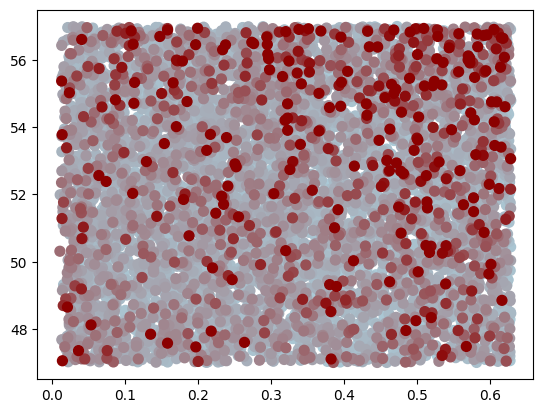

In [73]:
mismatch = benchmarker.error["radio-6GHz"]
cmap = colors.LinearSegmentedColormap.from_list(name = "mymap", colors = [(0, "lightblue"), (1, "darkred")])
colored_mismatch = cmap(mismatch/2)

sort = np.argsort(mismatch)
plt.scatter(benchmarker.test_X_raw[sort,2], benchmarker.test_X_raw[sort,1], c = colored_mismatch[sort], s = 50, rasterized = True)

In [70]:
benchmarker.test_X_raw[:, 2].max() / np.pi

0.19998279046318168


 
 
Correlations for filter radio-3GHz:

inclination_EM: 0.009590081398794937
log10_E0: 0.09434730356858056
thetaCore: 0.03345185286002759
alphaWing: -0.018076240317416073
log10_n0: -0.10220769704191264
p: 0.03268689713024139
log10_epsilon_e: 0.012567211389205512
log10_epsilon_B: 0.003044582412060385
Gamma0: -0.06722553407045523

 
 
Correlations for filter radio-6GHz:

inclination_EM: 0.008560409553185211
log10_E0: 0.0998777065124793
thetaCore: 0.034755561087990924
alphaWing: -0.01718302844350914
log10_n0: -0.10401897575582776
p: 0.0298600157588976
log10_epsilon_e: 0.012007760443084185
log10_epsilon_B: 0.002468566560280968
Gamma0: -0.06873524603523931

 
 
Correlations for filter bessellv:

inclination_EM: 0.011378132359801146
log10_E0: 0.11655354520150725
thetaCore: 0.04230095102270977
alphaWing: 0.013699856225908299
log10_n0: -0.12389836275596007
p: 0.02630545246382307
log10_epsilon_e: 0.0022532717118069665
log10_epsilon_B: -0.006019795284421316
Gamma0: -0.07850930419459531

 
 
Co

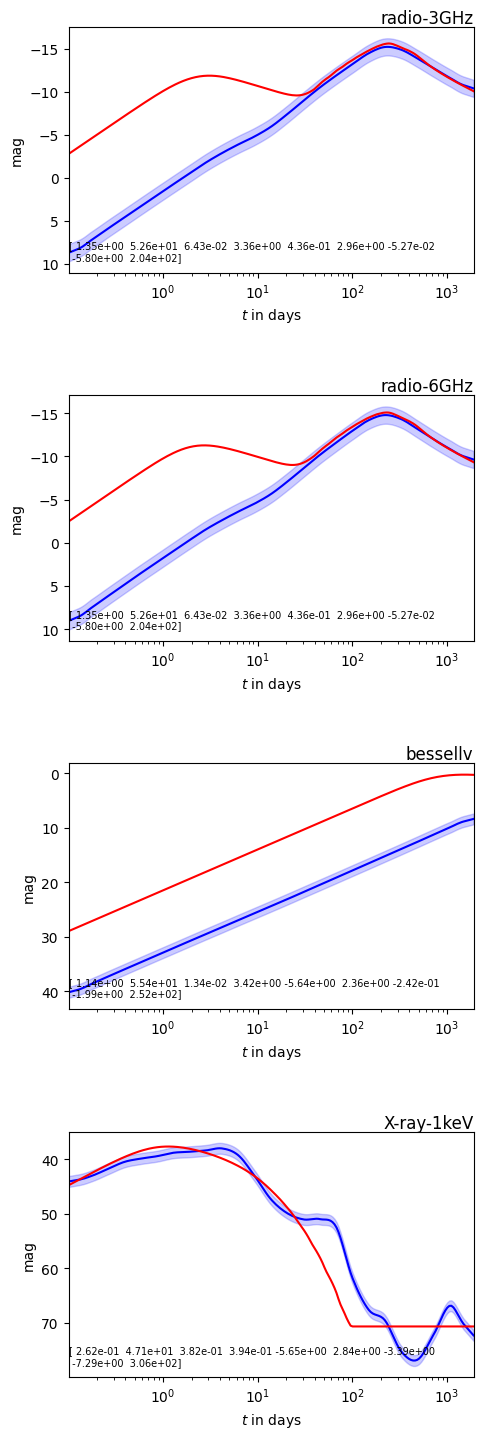

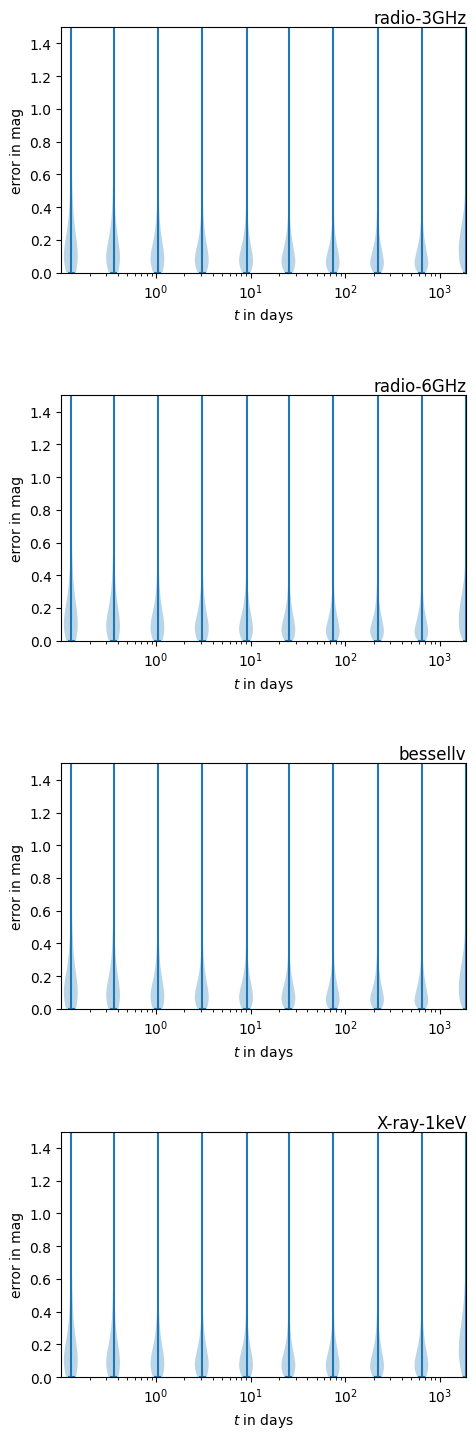

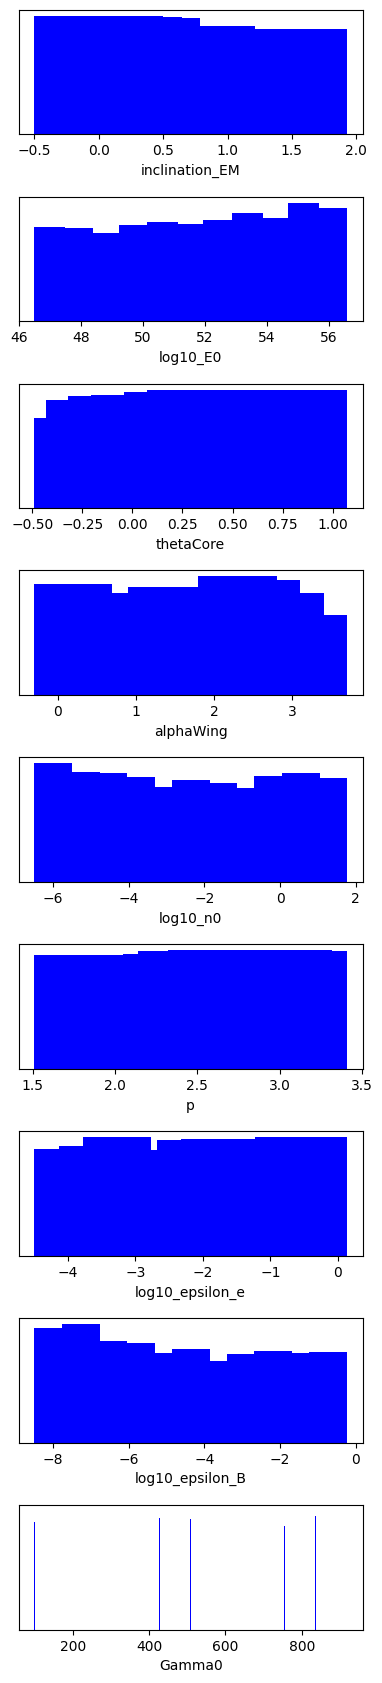

In [23]:
benchmarker.benchmark()